# Pymaceuticals Inc.
---

### Analysis - Observations and Insights
1. min and max mean value and correspondence value as shown
Naftisol
mean				54.331565
median   			52.509285
variance 			66.173479
standard deviation 	8.134708
SEM 				0.596466

Ramicane
mean				40.216745
median  			40.673236
variance			23.486704
standard deviation	4.846308
SEM                 0.320955	            

2. The bar graph shows that the drug regimen, Capomulin was tested on the maximum number of mice (230), followed by Ramicane (228).
3. The male and female mice population was very close- 
Female    922
Male      958

The overall performance of the drug, Capomulin was satisfactory.



In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sb


In [83]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview-------mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [84]:
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [85]:
# additional general information added here.......
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [86]:
# additional general information added here.......
study_results.Timepoint.value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [87]:
# Checking the number of mice.
len(mouse_metadata)

249

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(20)


Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
q633      20           1
          25           1
q610      15           1
q597      45           1
q610      5            1
dtype: int64

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df_backup = df.copy()

df = df.loc[df["Mouse ID"] != "g989"].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [91]:
# Checking the number of mice in the clean DataFrame.

df["Mouse ID"].nunique()


248

## Summary Statistics

In [92]:
# additional general information added here.......
df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# this is good info -----we did it as a group study-------

means = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
stat_summary = pd.DataFrame()
stat_summary["Mean"] = means
stat_summary["Median"] = med
stat_summary["Variance"] = var
stat_summary["Standard Deviation"] = stdev
stat_summary["SEM"] = sems
stat_summary = stat_summary.reset_index()
stat_summary

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [94]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

# note - any errors are just infomational

C:\Users\rajag\AppData\Local\Temp\ipykernel_30520\2595435272.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

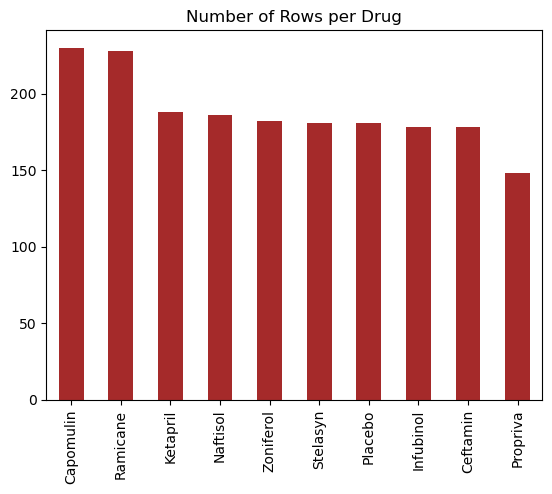

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data = df["Drug Regimen"].value_counts()

data.plot(kind="bar", title="Number of Rows per Drug", color="brown")
plt.show()


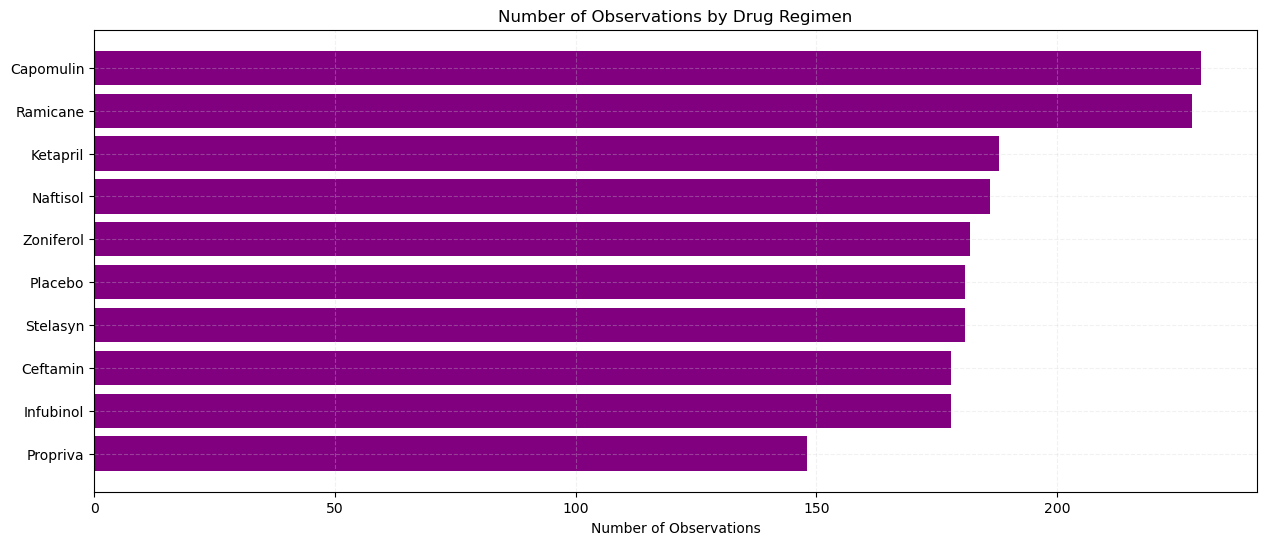

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = data.sort_values().reset_index()
data.columns = ["Drug Regimen", "Number of Rows"]


plt.figure(figsize=(15,6))
plt.barh(data["Drug Regimen"], data["Number of Rows"], color="purple")
plt.xlabel("Number of Observations")
plt.title("Number of Observations by Drug Regimen")

plt.grid(axis="both", color="lightgrey", alpha=0.3, linestyle="--")

plt.show()


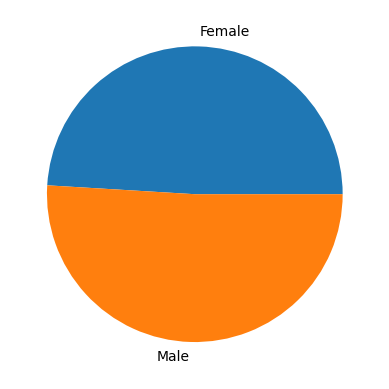

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df.groupby("Sex").size().plot(kind="pie")
plt.show()


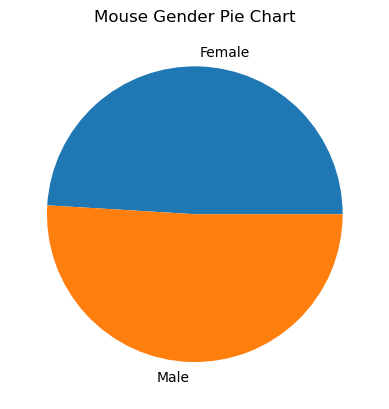

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = df.groupby("Sex").size().values
labels = ["Female", "Male"]
plt.pie(values, labels=labels)
plt.title("Mouse Gender Pie Chart")
plt.show()

In [99]:
# additional general information added here.......
df.groupby("Sex").size()

Sex
Female    922
Male      958
dtype: int64

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [101]:
max_time = df.groupby("Mouse ID")["Timepoint"].max().reset_index()

last_df = pd.merge(max_time, df, on=["Mouse ID", "Timepoint"], how="inner")
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [102]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds


In [103]:
# additional general information added here.......
df2 = last_df.loc[last_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].reset_index(drop=True)
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


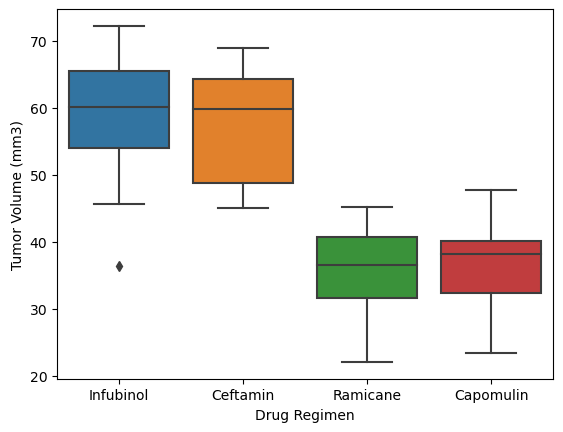

In [104]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sb.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

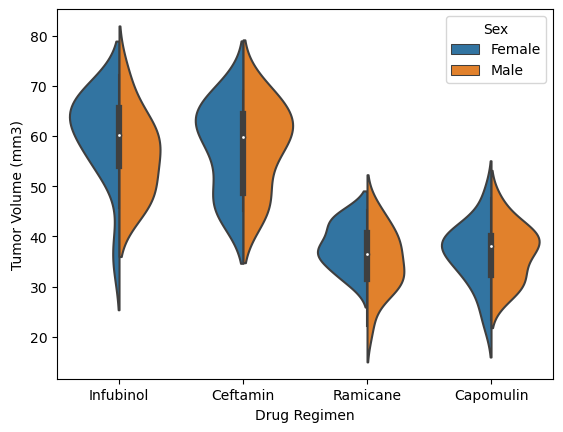

In [105]:
sb.violinplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)",hue="Sex", split=True)
plt.show()

In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = last_df.loc[last_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


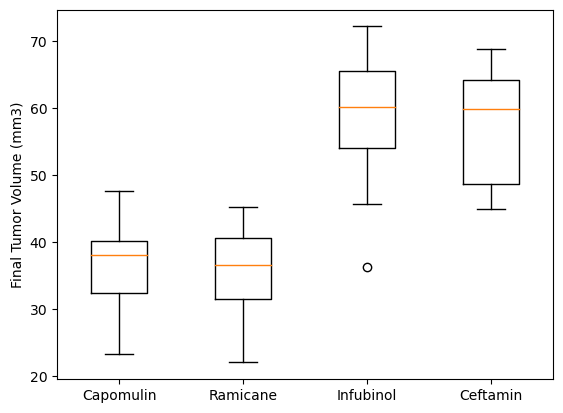

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

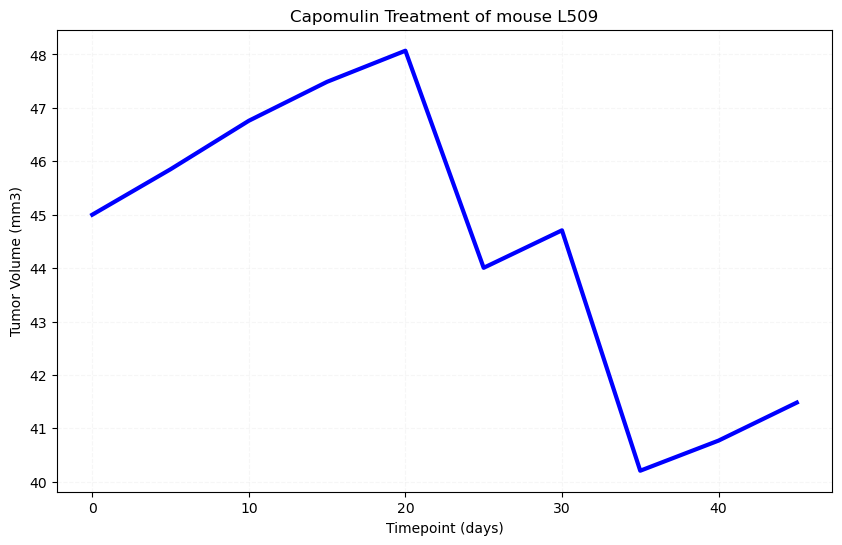

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_sub = df.loc[df["Mouse ID"] == "l509"] 

plt.figure(figsize=(10,6))
plt.plot(df_sub.Timepoint, df_sub["Tumor Volume (mm3)"], color="blue", linewidth=3)
plt.title("Capomulin Treatment of mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="both", color="lightgrey", alpha=0.2, linestyle="--")
plt.show()

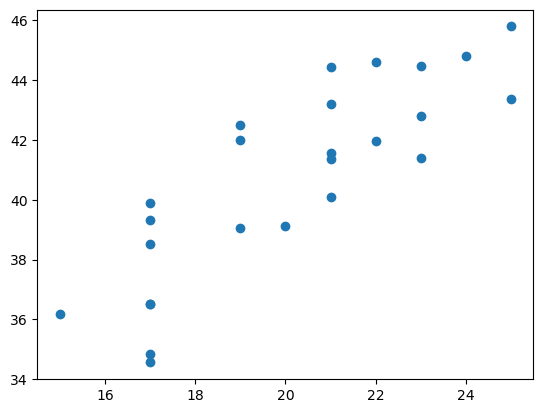

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]

plt.scatter(data["Average Weight"], data["Average Tumor Size"])
plt.show()

## Correlation and Regression

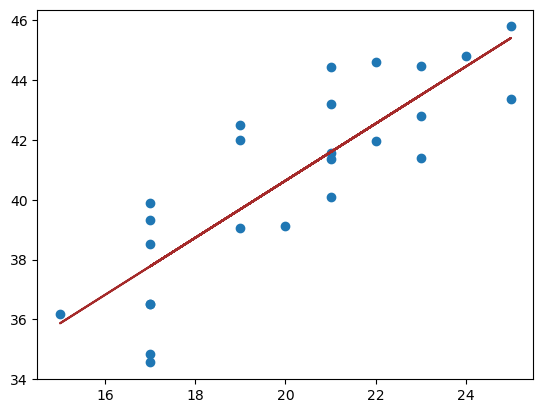

In [110]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import numpy as np
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]
# fit a linear regression line to the data
slope, intercept = np.polyfit(data["Average Weight"], data["Average Tumor Size"], 1)
line = slope * data ["Average Weight"] + intercept

plt.scatter(data["Average Weight"], data["Average Tumor Size"])
plt.plot(data["Average Weight"], line, color='brown')
plt.show()
                                                                          
                                                                          